In [1]:
%load_ext autoreload
%autoreload 2

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

import graph_utils as gu

import random

import cv2 as cv

### 1st Test

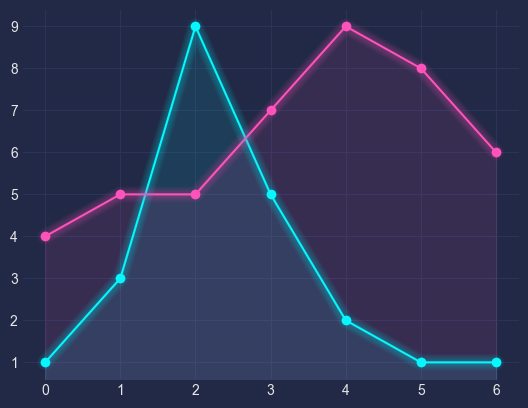

In [28]:
plt.style.use("cyberpunk")

plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='o')

mplcyberpunk.add_glow_effects()

plt.show()

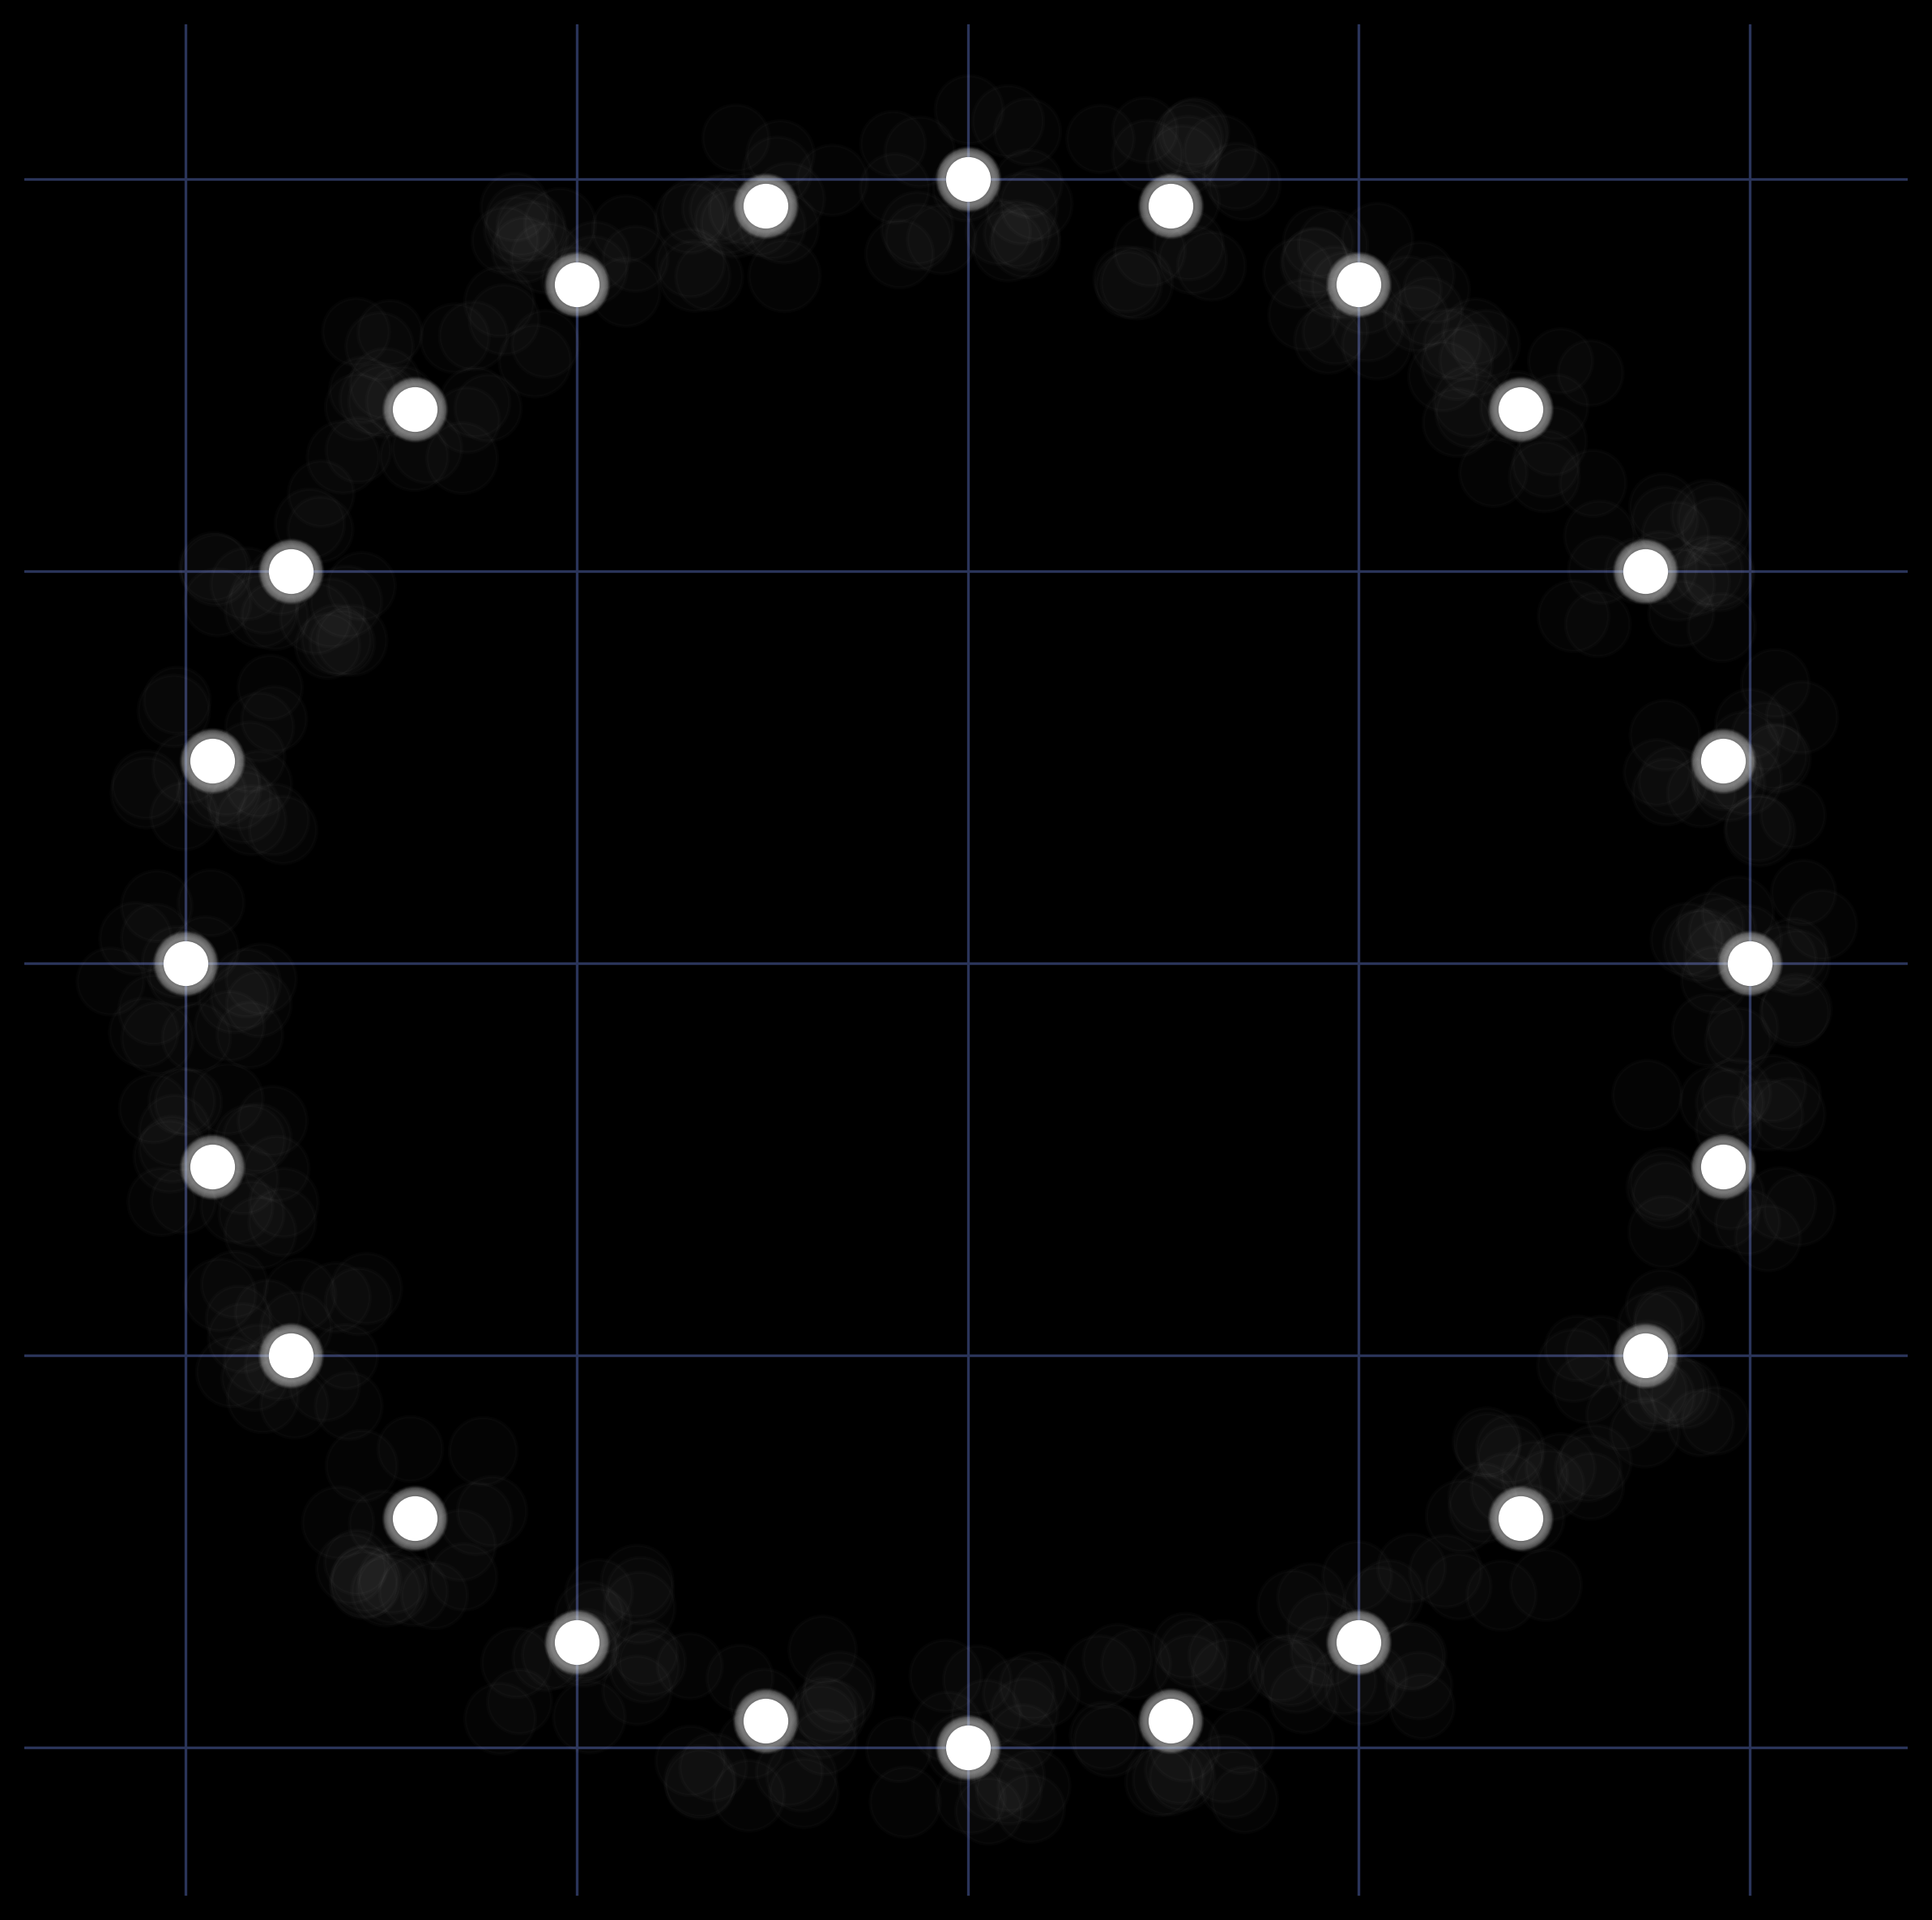

In [30]:
from graph_utils import *

G = nx.cycle_graph(24)
pos = nx.circular_layout(G)

draw_glow_nodes(G,pos)


### EEG

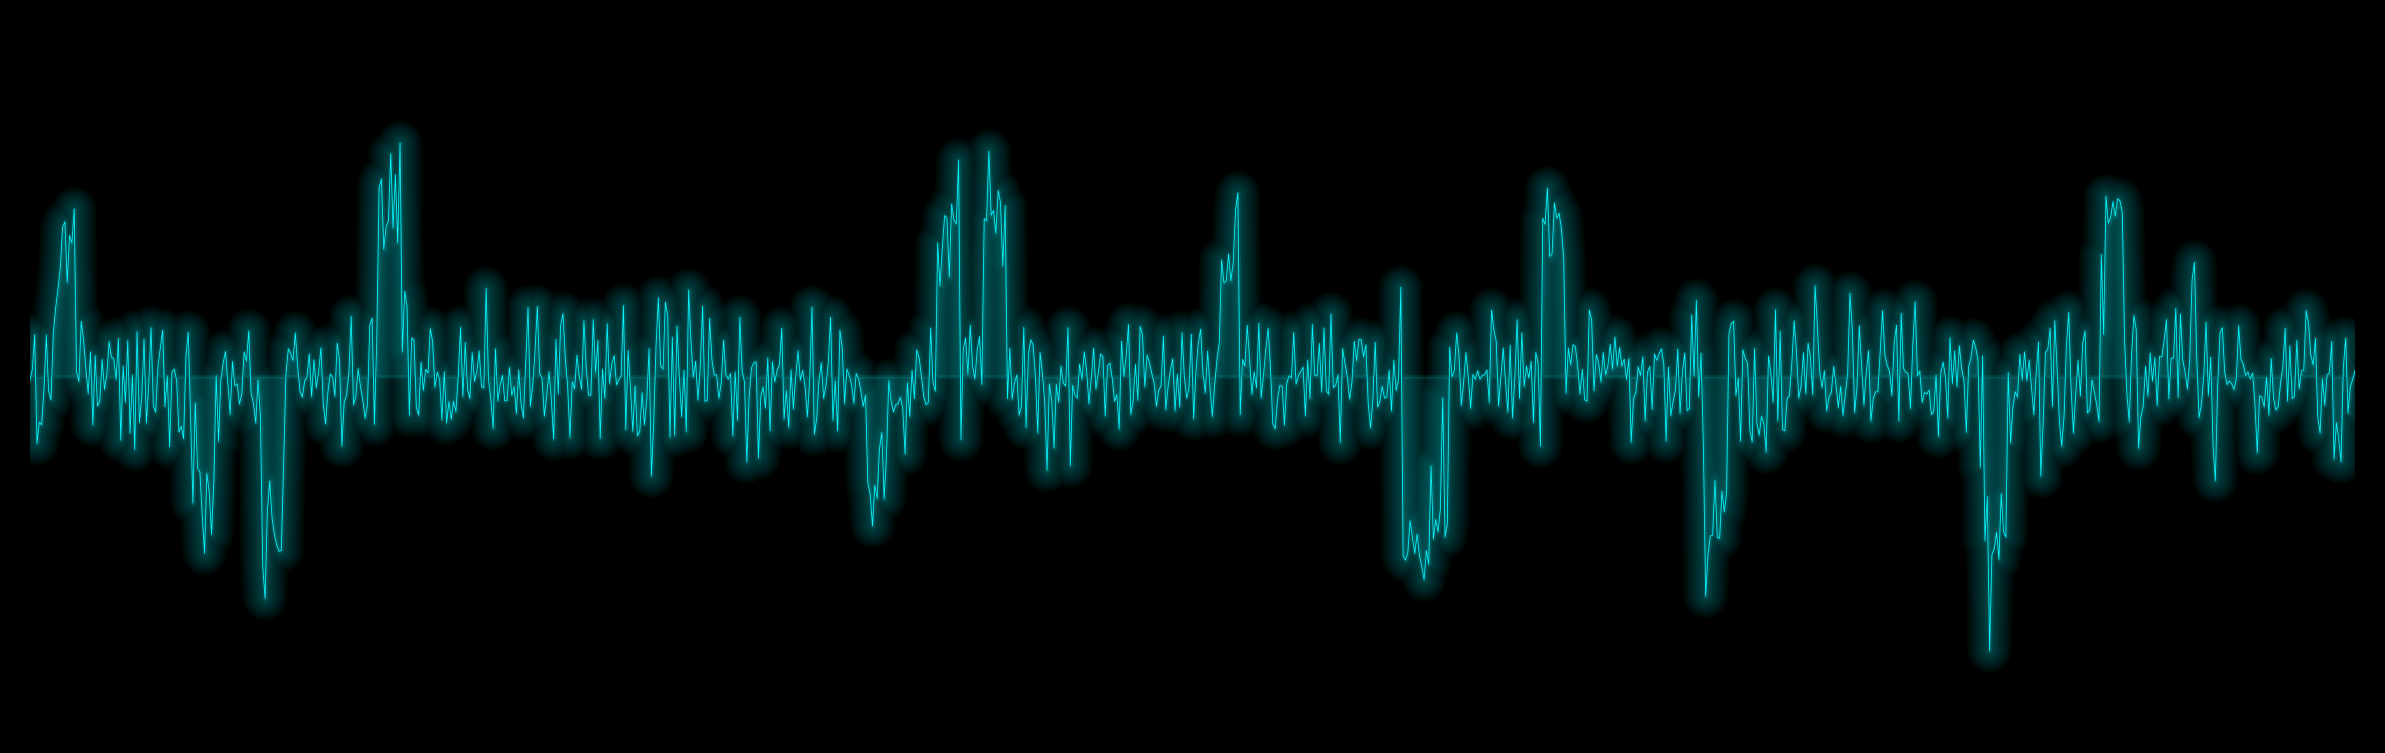

In [125]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=300)
#plot random noise around 1 and 0 


# Define the mask
mask = np.ones(1000)

for i in range(100):

    random_number = random.random()

    if random_number < 0.3:
        # Set 0 for the first 2/4 of the array
        mask[10*i:10*(i+1)] = 1
    else:
        mask[10*i:10*(i+1)] = 0





x = np.linspace(0, 8*np.pi, 1000)
y = np.sin(2*x)*mask + np.random.normal(0, 0.2, 1000)


ax.plot(x, y, linewidth=0.2)


mplcyberpunk.add_glow_effects()
# Turn off axis numbers
plt.xticks([])   # Turn off x-axis numbers
plt.yticks([])   # Turn off y-axis numbers

# Set limits to the axis
plt.xlim(0, 8*np.pi)  # Set x-axis limits
plt.ylim(-2, 2)   # Set y-axis limits

# Turn off the grid
plt.grid(False)

ax.set_facecolor('black')
fig.set_facecolor('black')

plt.show()

plt.savefig('demo.png', transparent=True)




    



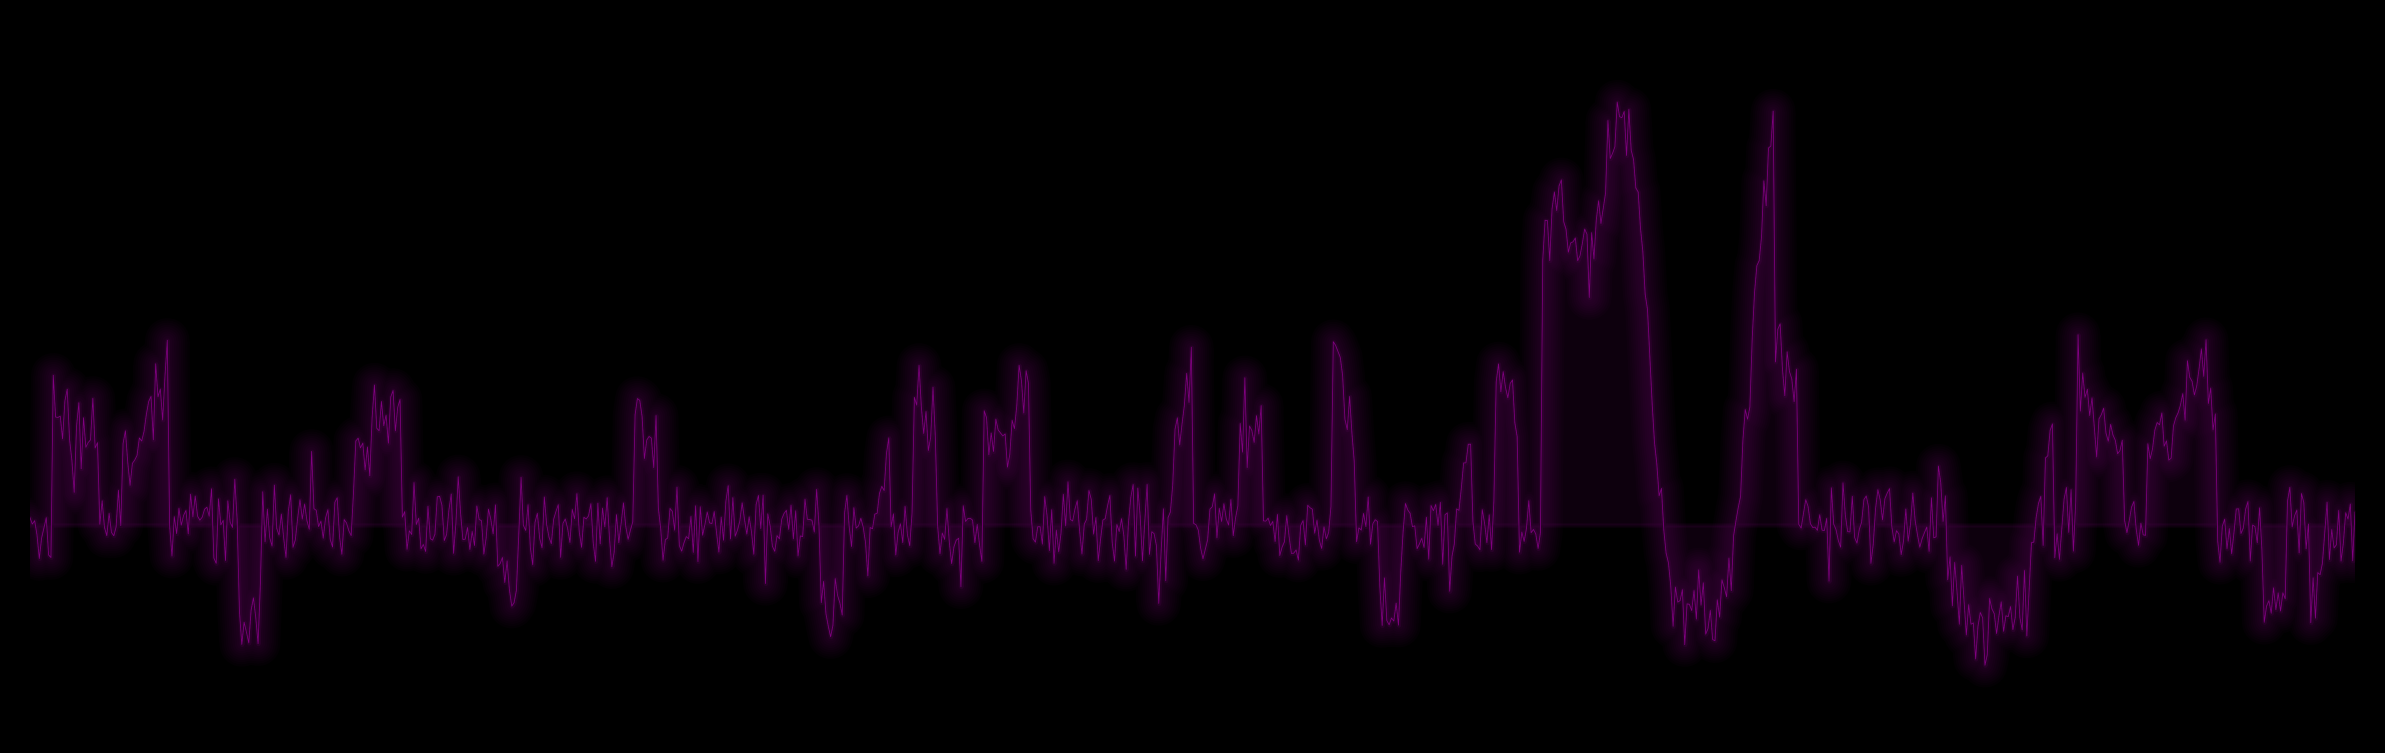

In [26]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=300)
#plot random noise around 1 and 0 


# Define the mask
mask = np.ones(1000)

for i in range(100):

    random_number = random.random()

    if random_number < 0.3:
        # Set 0 for the first 2/4 of the array
        mask[10*i:10*(i+1)] = 1
    else:
        mask[10*i:10*(i+1)] = 0

    mask[650:750]=2





x = np.linspace(0, 8*np.pi, 1000)
y = (np.sin(2*x) + 0.7*np.cos(4*x)+ 0.3*np.cos(8*x)+  mask/2   )*mask  + np.random.normal(0, 0.2, 1000)


ax.plot(x, y, linewidth=0.2, color='purple')


mplcyberpunk.add_glow_effects()
# Turn off axis numbers
plt.xticks([])   # Turn off x-axis numbers
plt.yticks([])   # Turn off y-axis numbers

# Set limits to the axis
plt.xlim(0, 8*np.pi)  # Set x-axis limits
plt.ylim(-2, 5)   # Set y-axis limits

# Turn off the grid
plt.grid(False)

ax.set_facecolor('black')
fig.set_facecolor('black')
plt.savefig('demo.png', transparent=True)
plt.show()



### my graph

In [168]:
# Set a random seed for reproducibility
random.seed(42)

# Create a graph
G = nx.Graph()

# Add 500 nodes to the graph
num_nodes = 200
G.add_nodes_from(range(num_nodes))

# Generate random positions for each node
node_positions = {node: (random.uniform(0, 1), random.uniform(0, 1)) for node in G.nodes()}

node_sizes = {node: random.uniform(15, 80) for node in G.nodes()}

node_groups =gu.get_group_nodes(G, node_positions)

gu.generateFrameGraph(G, node_positions,node_sizes, node_groups, np.array([1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0]), 1)

In [170]:
# Define the connectivity matrix
connectivity_matrix = np.array([
    [0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Assign initial values (0.5 or 1) to each node
node_values = [1,1,1,0,0,0,0,0,0]

timeseries = []
timeseries = gu.extend_time_series(timeseries, 3, 9)
timeseries.append(node_values)
for i in range(20):
    node_values = gu.propagation_step(connectivity_matrix, node_values)
    timeseries = gu.extend_time_series(timeseries, 25,9)
    timeseries.append(node_values)

    if np.sum(node_values) == 0:
        #node_values = np.random.choice([0, 1], size=9)*np.array([1,1,1,0,0,0,0,0,0])
        node_values = [1,1,1,0,0,0,0,0,0]
        timeseries.append(node_values)

#print(np.array(timeseries))

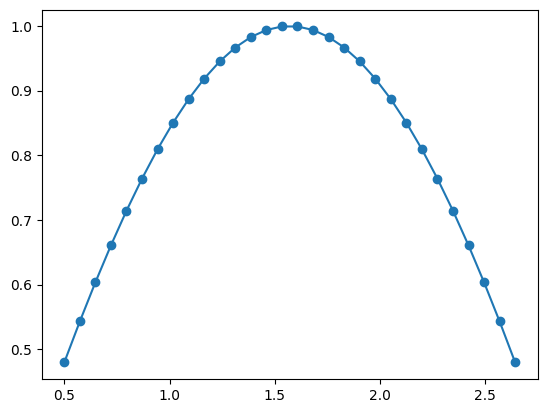

In [171]:
time_sin = np.linspace(0.5, np.pi-0.5, 30)
sin_values = np.sin(time_sin)

plt.plot(time_sin, sin_values, marker='o')

(529, 9)


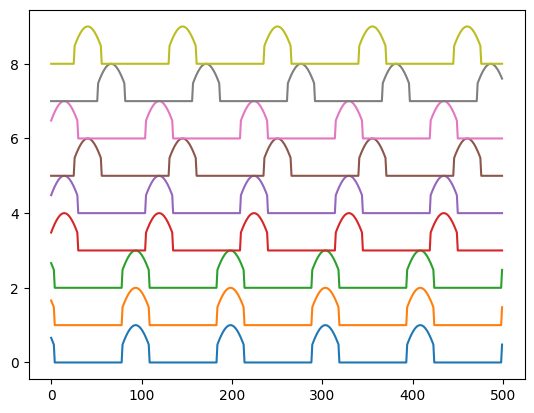

(529,)
(500,)
(500,)


In [173]:
# Create two 1-dimensional arrays (input and kernel)
import copy 
timeseries2 = copy.deepcopy(timeseries)
timeseries2 = np.array(timeseries2)

print(timeseries2.shape)
timeseries2_conv = []

for i in range(timeseries2.shape[1]):
    
    input_array = timeseries2[:,i]
    #kernel = np.array([0.5, 0.5, 0.7, 0.7,1,1, 1,0.7, 0.7, 0.5,0.5])
    kernel = sin_values
    # Perform convolution
    result = np.convolve(input_array, kernel, mode='valid')

    timeseries2_conv.append(result) 

for i,result in enumerate(timeseries2_conv):
    plt.plot(result+i)

plt.show()

print(input_array.shape)
print(result.shape)
print(result.shape)



In [174]:
timeseries_dataset= np.array(timeseries2_conv)
timeseries_dataset = timeseries_dataset.T

In [175]:
for i, val  in enumerate(timeseries_dataset):
  
    gu.generateFrameGraph(G,node_positions, node_sizes,node_groups, val , i)
    i+=1    

In [176]:
import cv2
import os

# Path to the folder containing images
folder_path = "imgs2vid"

# Output video file name
output_video_path = "output_video.mp4"

# Frame rate (20 frames per second)
fps = 10

# Function to sort the filenames numerically
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    return sorted(data, key=convert)

# Get the list of image files in the folder
image_files = sorted_alphanumeric([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))])

# Get the first image to determine the video size
first_image = cv2.imread(os.path.join(folder_path, image_files[0]))
height, width, _ = first_image.shape

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can also use 'XVID' or 'MJPG' depending on your system
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Add each image to the video
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    frame = cv2.imread(image_path)
    video_writer.write(frame)

# Release the VideoWriter object
video_writer.release()

print(f"Video created: {output_video_path}")

Video created: output_video.mp4


Result of Convolution: [0.7 0.5 0.7 0.7 1. ]


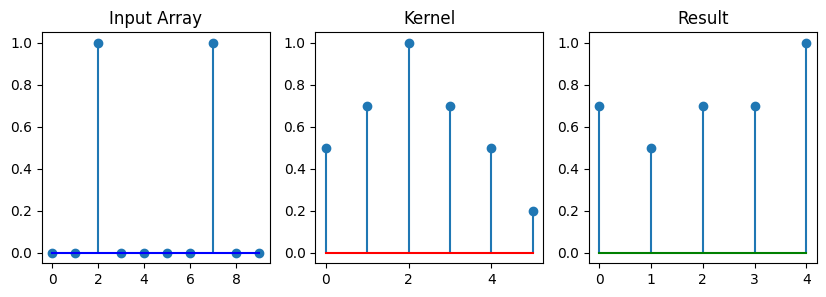

In [20]:


# Create two 1-dimensional arrays (input and kernel)
input_array = np.array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0])
kernel = np.array([0.5, 0.7, 1, 0.7, 0.5,0.2])
# Perform convolution
result = np.convolve(input_array, kernel, mode='valid')

# Print the result
print("Result of Convolution:", result)

# Plot the input, kernel, and result
plt.figure(figsize=(10, 3))
plt.subplot(131)
plt.stem(input_array, basefmt='b')
plt.title("Input Array")

plt.subplot(132)
plt.stem(kernel, basefmt='r')
plt.title("Kernel")

plt.subplot(133)
plt.stem(result, basefmt='g')
plt.title("Result")

plt.show()

C:\Users\aleja\AppData\Local\Temp\ipykernel_31840\1183457932.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('gray'),


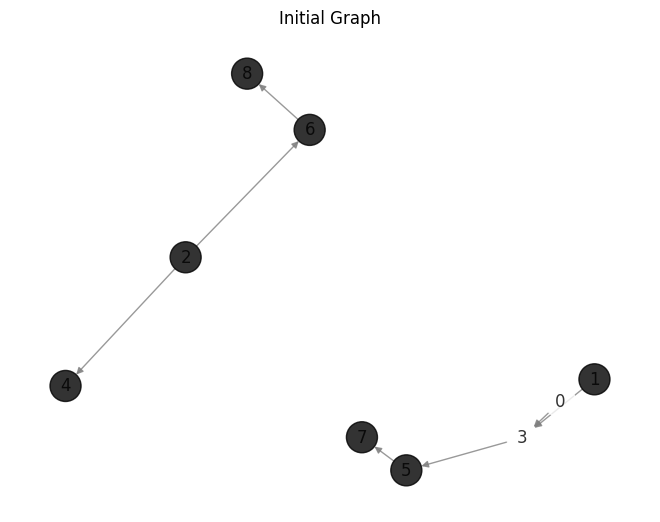

Initial node values:
[1, 0, 0, 1, 0, 0, 0, 0, 0]
New node values:
{0: 1, 1: 0, 2: 0, 3: 0.5, 4: 0.0, 5: 1.0, 6: 0.0, 7: 0.0, 8: 0.0}


C:\Users\aleja\AppData\Local\Temp\ipykernel_31840\1183457932.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('gray'),


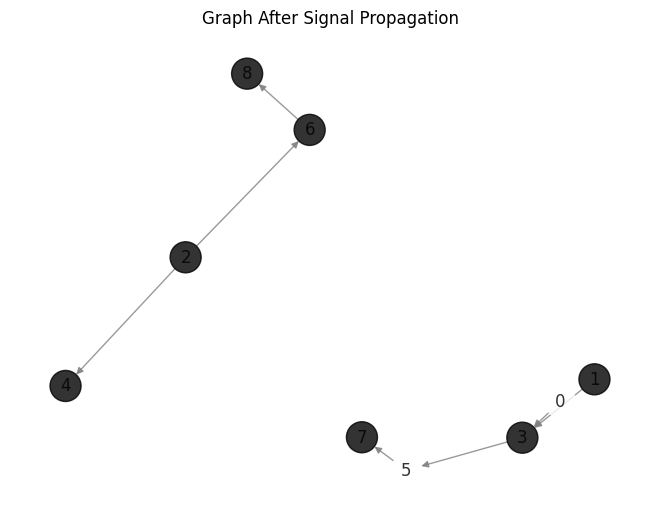

In [167]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Set a random seed for reproducibility
random.seed(42)

# Define the connectivity matrix
connectivity_matrix = np.array([
    [0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Create a directed graph from the connectivity matrix
G = nx.DiGraph(connectivity_matrix)


# Assign initial values (0.5 or 1) to each node
node_values = [1,0,0,1,0,0,0,0,0]

# Draw the initial graph with node colors based on initial values
pos = nx.spring_layout(G)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color=[node_values[node] for node in G.nodes()],
    cmap=plt.cm.get_cmap('gray'),
    vmin=0.5,
    vmax=1,
    alpha=0.8,
    edge_color='gray',
)
plt.title("Initial Graph")

# Show the plot
plt.show()

# Propagate the signal through the graph
alpha = 1  # Damping factor for signal propagation
num_iterations = 1
print("Initial node values:")
print(node_values)
for _ in range(num_iterations):
    new_node_values = {}

    for node in G.nodes():
        in_neighbors = list(G.predecessors(node))
        if in_neighbors:
            new_value = alpha * sum(node_values[neighbor] for neighbor in in_neighbors) / len(in_neighbors)
            new_node_values[node] = new_value
        else:
            new_node_values[node] = node_values[node]

    node_values = new_node_values

print("New node values:")
print(node_values)
# Draw the graph after signal propagation with updated node values
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color=[node_values[node] for node in G.nodes()],
    cmap=plt.cm.get_cmap('gray'),
    vmin=0.5,
    vmax=1,
    alpha=0.8,
    edge_color='gray',
)
plt.title("Graph After Signal Propagation")

# Show the plot
plt.show()

In [65]:
adjacency_matrix = nx.to_numpy_array(G)

# Print the connectivity matrix
print("Connectivity Matrix:")
print(adjacency_matrix)

Connectivity Matrix:
[[0. 0. 1. 1. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 0. 0.]]


## Manim

In [1]:
import numpy as np
from copy import deepcopy
import itertools
import matplotlib
import matplotlib.pyplot as plt
from numpy import radians as rad
from matplotlib.animation import FuncAnimation
from scipy.ndimage import convolve,convolve1d
import cmasher
import seaborn as sns

In [2]:
NUM_LAYERS = 10
NEURONS_PER_LAYER = 10
NUM_FRAMES=2000

In [3]:
def network_init():
	return np.zeros((NUM_LAYERS, NEURONS_PER_LAYER),dtype=bool)
   

def network_advance(old_network, sigma,spont_prob):
    '''Advance one time step'''
    network = deepcopy(old_network)
    spont = np.random.rand(*network.shape)
    network[spont<spont_prob] = 1 # Random spontaneous activity
    for layer_num in range(NUM_LAYERS-1, 0, -1):
        # Randomly propagate, starting from the last layer
        propagation_mask = np.random.rand(NEURONS_PER_LAYER) < sigma*np.sum(network[layer_num-1,:])/NEURONS_PER_LAYER
        network[layer_num] = propagation_mask
        network[layer_num-1] = np.zeros(NEURONS_PER_LAYER)
    return network
                    

def run_simulation(network, n_steps, sigma=1, spont_prob=0.01):
    '''Run simulation with stochastic activity for n_steps'''
    network_states = np.zeros((n_steps, NUM_LAYERS, NEURONS_PER_LAYER))
    network_states[0,:,:] = network
    
    for step in range(1,n_steps):
        network_states[step, :,:] = network_advance(network_states[step-1, :,:], sigma,spont_prob)
    return network_states


# --- Smoothing activity
def smooth_activity(network_states, time_stretch=3):
    '''
        Smooth the activity in time for a more eye-pleasant animation 
    '''
    def get_symmetric_kernel(slope=-20, npoints=100):
        t = np.linspace(0,1,npoints)
        kernel = np.zeros_like(t)
        t_mask = t>0.5
        kernel[t_mask]=np.exp(slope*t[t_mask])
        kernel[(t<=0.5)]=np.exp(slope*t[t_mask])[::-1]
        return kernel/kernel[t_mask][0]

    kernel = get_symmetric_kernel(-60)
    smoothed_activity = np.zeros((network_states.shape[0]*time_stretch, network_states.shape[1], network_states.shape[2]))
    smoothed_activity[::time_stretch, :, :] = network_states
    smoothed_activity = convolve1d(smoothed_activity, kernel, axis=0,mode="constant",origin=0)
    return smoothed_activity

In [4]:
NUM_LAYERS = 10
NEURONS_PER_LAYER = 10
NUM_FRAMES=2000

# --- Simulation
network = network_init()
network_states = run_simulation(network, NUM_FRAMES, sigma=1,spont_prob=0.01)
smoothed_states = smooth_activity(network_states)

In [5]:
def multilayered_graph(subset_sizes, edge_prob=0.35):
    ''' Generate a networkx multilayered graph with specied layer sizes '''
    extents = nx.utils.pairwise(itertools.accumulate([0] + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in nx.utils.pairwise(layers):
        all_edges = list(itertools.product(layer1, layer2))
        selected_edges = np.random.choice(range(len(all_edges)),  size=int(len(all_edges)*edge_prob), replace=False)
        for k in selected_edges:  
            G.add_edge(*all_edges[k])
    return G

In [6]:
from manim import *
import networkx as nx
from scipy.interpolate import interp1d
import itertools

Manim Community v0.18.0

In [8]:
# --- Animation with Manim
class BranchingModelRearranging(Scene):
    def construct(self):
        
        # Set up coordinate systems
        shuffled_ax = Axes(x_range=(0,NUM_LAYERS), y_range=(0,NEURONS_PER_LAYER),x_length=7, y_length=7)
        layers_ax = Axes(x_range=(0,NUM_LAYERS), y_range=(0,NEURONS_PER_LAYER),x_length=13, y_length=7)
        
        # --- Mapping
        mapping = np.array(list(itertools.product(range(shuffled_ax.x_range[1]), range(shuffled_ax.y_range[1]))), dtype=object)
        layout_layered = {k: layers_ax.c2p(*mapping[k]) for k in range(NUM_LAYERS*NEURONS_PER_LAYER)}
        np.random.shuffle(mapping)
        layout_shuffle = {k: shuffled_ax.c2p(*mapping[k]) for k in range(NUM_LAYERS*NEURONS_PER_LAYER)}

        # Construct a graph object
        G = multilayered_graph(([NEURONS_PER_LAYER]*NUM_LAYERS))
        graph = Graph.from_networkx(G,layout=layout_shuffle,vertex_config={'radius': 0.2}, 
                                    edge_config={"stroke_width":0.5, "stroke_color":GRAY})
        
        # Interpolation function to animate the color of the nodes according to simulation data
        value_interp_function = interp1d(np.arange(smoothed_states.shape[0]), 
                                         smoothed_states.reshape(smoothed_states.shape[0], NUM_LAYERS*NEURONS_PER_LAYER), axis=0)
        
        cmap = cmasher.get_sub_cmap(sns.color_palette("mako",as_cmap=True),0.2,1)
        
        
        def update_node_colors(graph):
            for k in range(len(G.nodes)):
                color =  cmap(value_interp_function(time_tracker.get_value())[k])
                graph[k].set_color(rgba_to_color(color))
            
        time_tracker = ValueTracker() # Progressing through simulation data
        graph.add_updater(update_node_colors)
        self.add(graph)
        
        # --- Animating (make sure that there is enough frames in the simulation data)
        FPS = 30 
        PLAY_TIME_BEFORE_REARRANGING = 20
        PLAY_TIME_AFTER_REARRANGING = 5
        REARRANGING_TIME = 2
        
        def get_shuffle2layered_anims():
            return [graph[k].animate.move_to(layout_layered[k]) for k in range(len(G.nodes))]
        
        def animate_network(playing_time):
            self.play(time_tracker.animate.increment_value(int(playing_time*FPS)), run_time=playing_time, rate_func=linear)
        
        animate_network(PLAY_TIME_BEFORE_REARRANGING)
       
            
        self.play(*(get_shuffle2layered_anims() + 
                    [time_tracker.animate.increment_value(int(REARRANGING_TIME*FPS))]),
                    run_time=REARRANGING_TIME, rate_func=linear)

        animate_network(PLAY_TIME_AFTER_REARRANGING)
        self.wait()

In [9]:
%manim BranchingModelRearranging

[11/15/23 22:38:28] INFO     Animation 0 : Partial movie file written in                   ]8;id=586232;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=923401;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\                         
                             media\videos\ManimAnimations\1080p60\partial_movie_files\Bran                         
                             chingModelRearranging\3977891868_1406819507_3355622424.mp4'                           

[11/15/23 22:38:46] INFO     Animation 1 : Partial movie file written in                   ]8;id=767791;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=768377;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\                         
                             media\videos\ManimAnimations\1080p60\partial_movie_files\Bran                         
                             chingModelRearranging\2852726489_4175014445_3236478867.mp4'                           

[11/15/23 22:39:23] INFO     Animation 2 : Partial movie file written in                   ]8;id=35507;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=373433;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\                         
                             media\videos\ManimAnimations\1080p60\partial_movie_files\Bran                         
                             chingModelRearranging\2852726489_381593495_4085497260.mp4'                            

[11/15/23 22:39:24] INFO     Animation 3 : Partial movie file written in                   ]8;id=485678;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=894636;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\                         
                             media\videos\ManimAnimations\1080p60\partial_movie_files\Bran                         
                             chingModelRearranging\2852726489_1704852926_2647454348.mp4'                           

                    INFO     Combining to Movie file.                                      ]8;id=599327;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=360477;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=168229;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=353143;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\                         
                             media\videos\ManimAnimations\1080p60\BranchingModelRearrangin                         
                             g.mp4'                                                                                
                                                                                                                   

                    INFO     Rendered BranchingModelRearranging                                        ]8;id=497150;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=216679;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 4 animations                                                                   

## My Mainim

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import random


# --- Animation with Manim
class NeuronStates(Scene):
    def construct(self):



        # Set a random seed for reproducibility
        random.seed(42)

        # Define the connectivity matrix
        connectivity_matrix = np.array([
            [0, 1, 0, 0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1],
            [0, 0, 0, 0, 0, 0, 0, 0, 0]
        ])

        # Create a directed graph from the connectivity matrix
        G = nx.DiGraph(connectivity_matrix)


        graph = Graph.from_networkx(G, edge_config={"stroke_width":0.0})
        
        
        
        cmap = cmasher.get_sub_cmap(sns.color_palette("mako",as_cmap=True),0.2,1)
        
        
        def update_node_colors(graph):
            for k in range(len(G.nodes)):
                
                graph[k].set_color(rgba_to_color( int(np.round(random.random())*255)  ))
            
        time_tracker = ValueTracker() # Progressing through simulation data
        graph.add_updater(update_node_colors)
        self.add(graph)
        
        # --- Animating (make sure that there is enough frames in the simulation data)
        FPS = 30 
        PLAY_TIME_BEFORE_REARRANGING = 20
        PLAY_TIME_AFTER_REARRANGING = 5
        REARRANGING_TIME = 2
        
       
        
        def animate_network(playing_time):
            self.play(time_tracker.animate.increment_value(int(playing_time*FPS)), run_time=playing_time, rate_func=linear)
        
        animate_network(PLAY_TIME_BEFORE_REARRANGING)
       

        self.wait()

In [21]:
%manim NeuronStates


[11/15/23 22:58:58] INFO     Animation 0 : Partial movie file written in                   ]8;id=773276;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=17484;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\                         
                             media\videos\ManimAnimations\1080p60\partial_movie_files\Neur                         
                             onStates\3977891868_1406819507_3376861669.mp4'                                        

[11/15/23 22:58:59] INFO     Animation 1 : Partial movie file written in                   ]8;id=943368;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=331853;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\                         
                             media\videos\ManimAnimations\1080p60\partial_movie_files\Neur                         
                             onStates\2852726489_1704852926_4154716360.mp4'                                        

                    INFO     Combining to Movie file.                                      ]8;id=615354;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=757213;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=986233;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=696773;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\                         
                             media\videos\ManimAnimations\1080p60\NeuronStates.mp4'                                
                                                                                                                   

                    INFO     Rendered NeuronStates                                                     ]8;id=702169;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=64470;file://c:\Users\aleja\Documents\TUDelft\Repository\ManimAnimations\.conda\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 2 animations                                                                   

## Comparision connecvity maps

In [128]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import copy

def generate_graph():
    G = nx.Graph()

    n_nodes = 80

    n_clusters = int(n_nodes/8)

    # Add 50 nodes with different neon colors for each cluster
    for i in range(n_nodes):
        cluster = i // n_clusters  # 8 clusters
        neon_colors = ['#FF00FF', '#00FFFF', '#FFFF00', '#FFA500', '#FF4500', '#8A2BE2', '#00FF00', '#FF1493', '#00FF7F', '#FFD700']
        node_color = neon_colors[cluster]
        G.add_node(i, color=node_color)

    G1 = copy.deepcopy(G)

    # Connect nodes within the same cluster
    for i in range(0, n_nodes, n_clusters):
        for j in range(i, i + n_clusters):
            for k in range(j + 1, i + n_clusters):
                if random.random() < 0.5:
                    strength = random.uniform(0.2, 1)
                    G.add_edge(j, k, weight=strength)

    # Connect nodes between different clusters
    for i in range(n_nodes):
        for j in range(i + 1, n_nodes):
            if i // n_clusters != j // n_clusters and random.random() < 0.0035:
                strength = random.uniform(1, 5)
                G1.add_edge(i, j, weight=strength)

    return G,G1

def subsample_connections(G, subsample_prob):
    # Subsample connections with the given probability
    edges_to_remove = []
    for edge in G.edges():
        if random.random() > subsample_prob:
            edges_to_remove.append(edge)

    G.remove_edges_from(edges_to_remove)

def draw_graph(G,G1):
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
    
    pos = nx.circular_layout(G)
    edges = G.edges()
    edges1 = G1.edges()
    
    weights = [G[u][v]['weight'] for u, v in edges]
    weights1 = [G1[u][v]['weight'] for u, v in edges1]

    node_colors = [G.nodes[n]['color'] for n in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100, alpha=0.5)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50, alpha=1)
    nx.draw_networkx_edges(G, pos, edgelist=edges, node_size=100, width=weights, edge_color=weights,arrows=True, connectionstyle="arc3,rad=-0.5", edge_cmap=plt.cm.Blues)
    nx.draw_networkx_edges(G1, pos, edgelist=edges1, node_size=100, width=weights1, edge_color=weights1,arrows=True, connectionstyle="arc3,rad=-0.25", edge_cmap=plt.cm.BuPu)

    ax.set_facecolor('black')
    fig.set_facecolor('black')
    fig.patch.set_visible(False)

    plt.axis('off')
    plt.show()





In [131]:
G,G1 = generate_graph()

Gs,Gs1 = copy.deepcopy(G),copy.deepcopy(G1)

subsample_connections(Gs, 0.6)
subsample_connections(Gs1, 0.3)

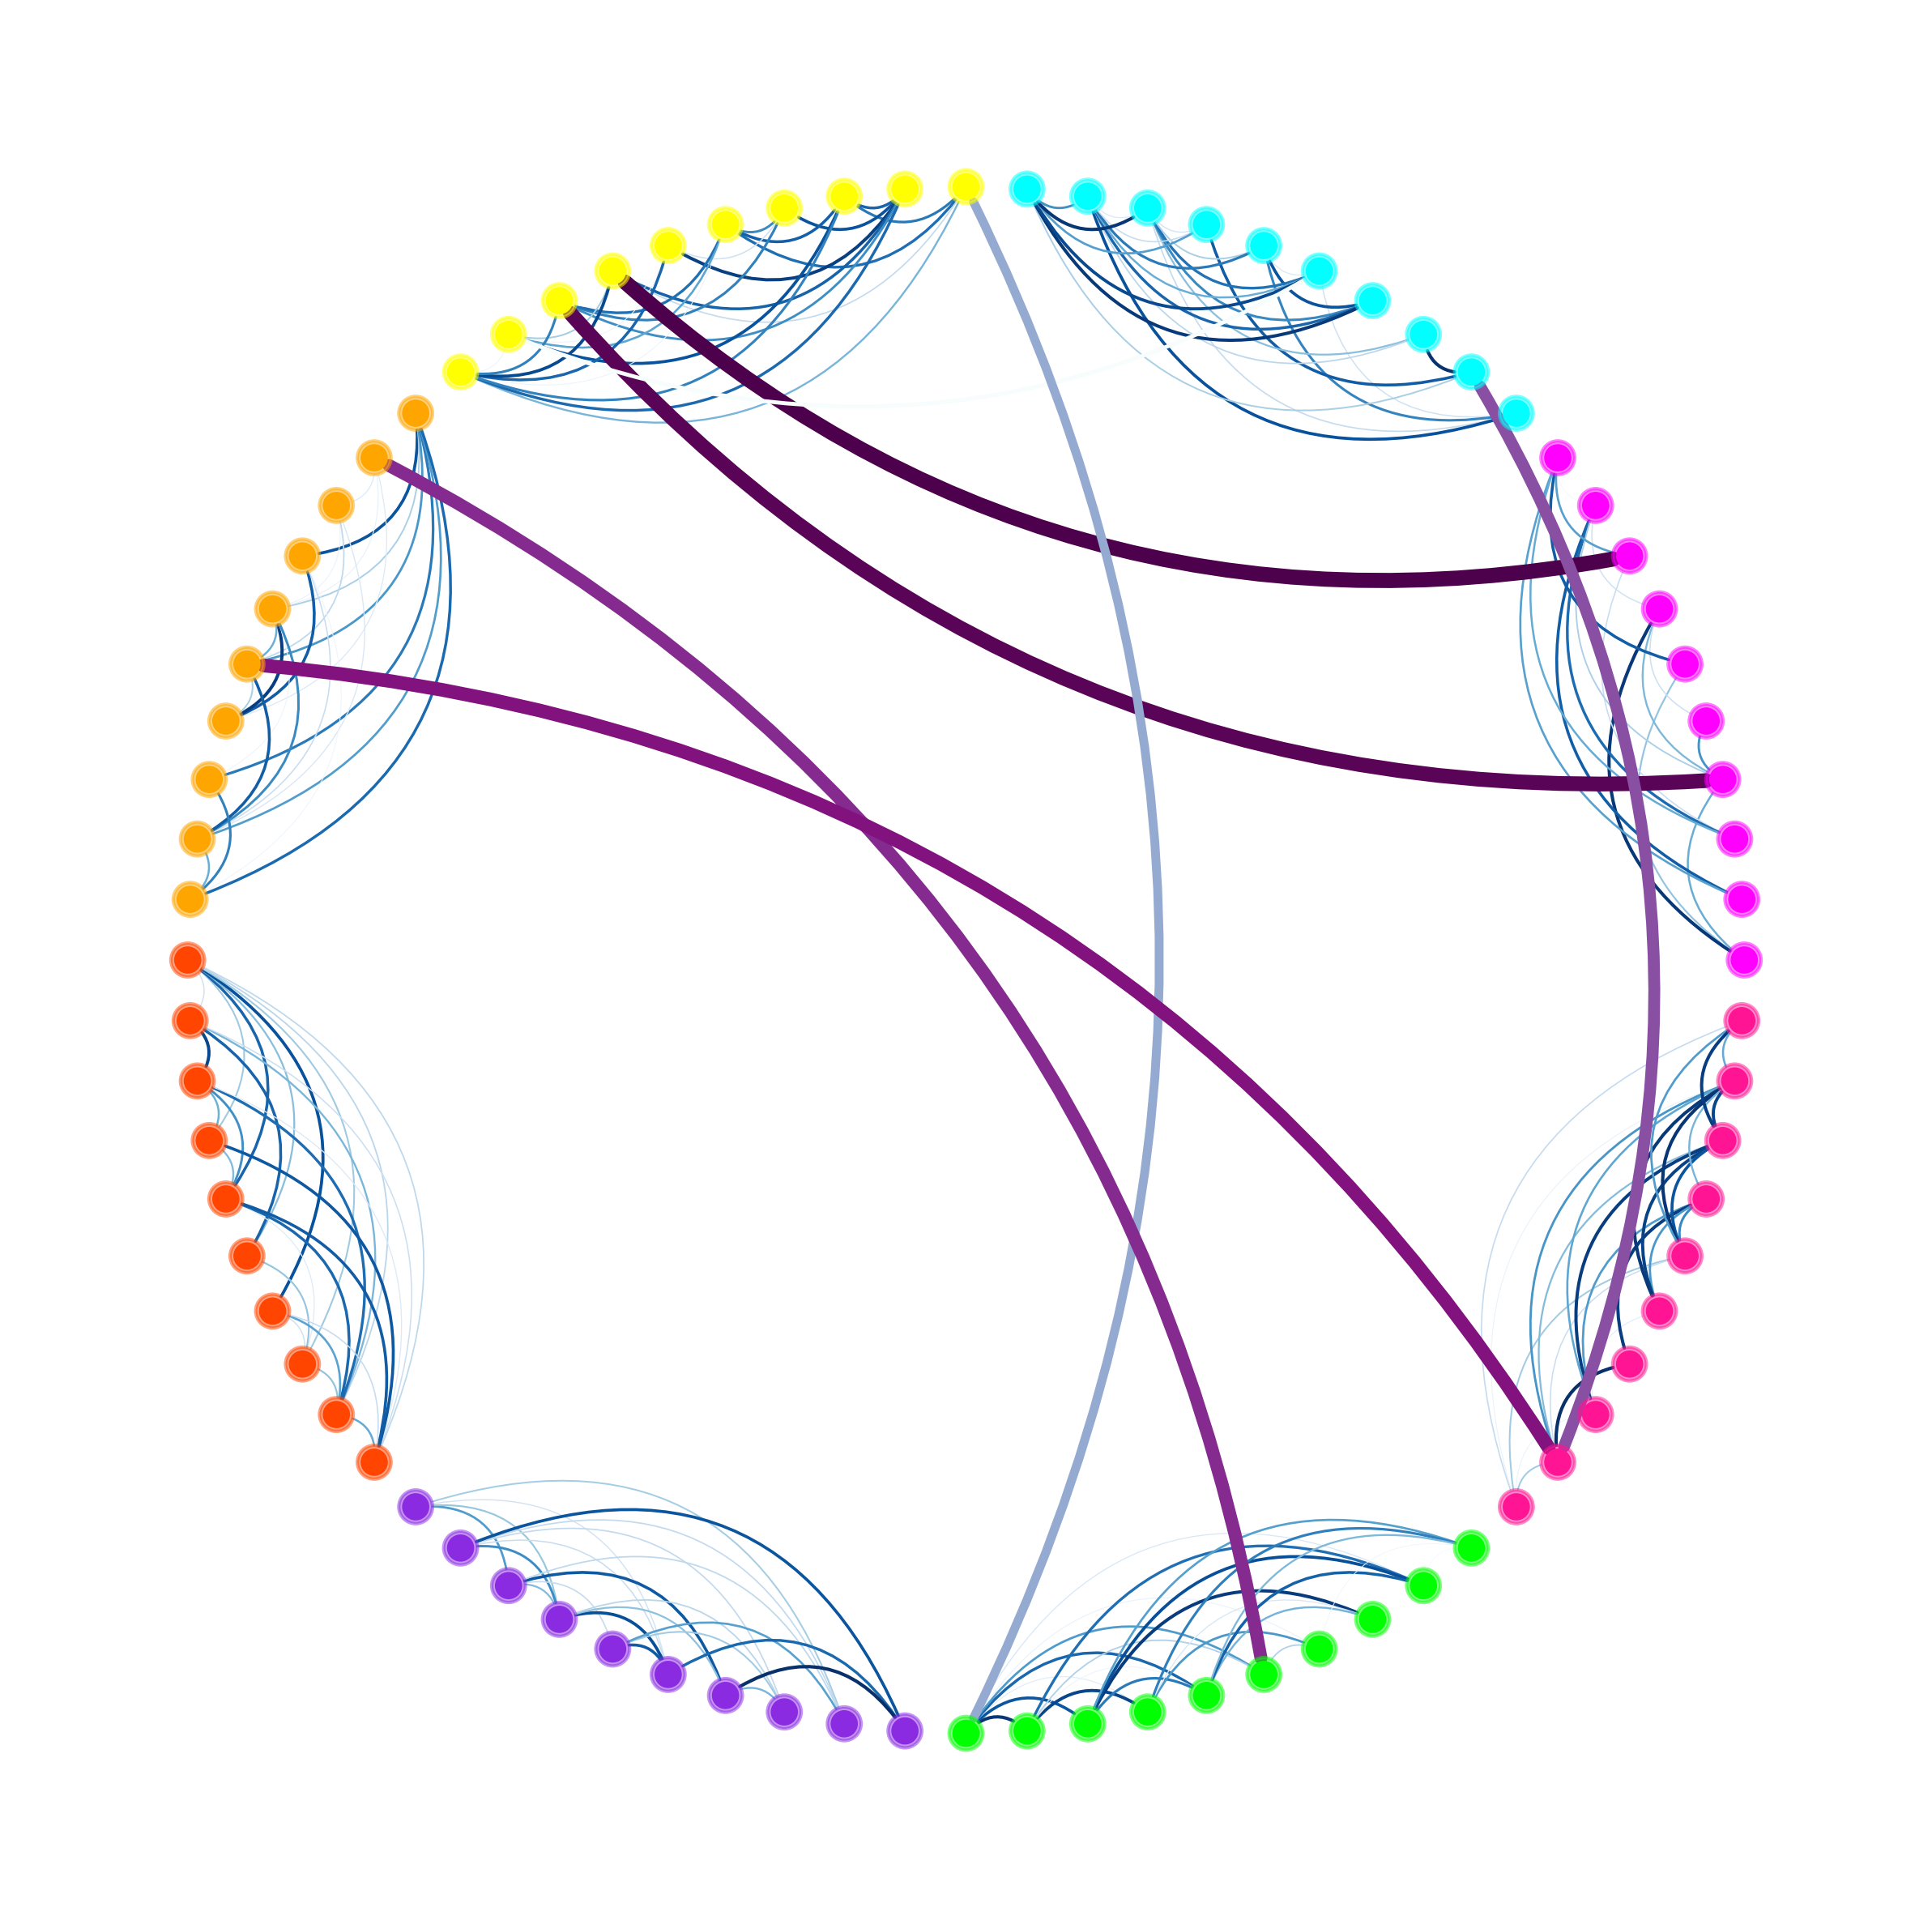

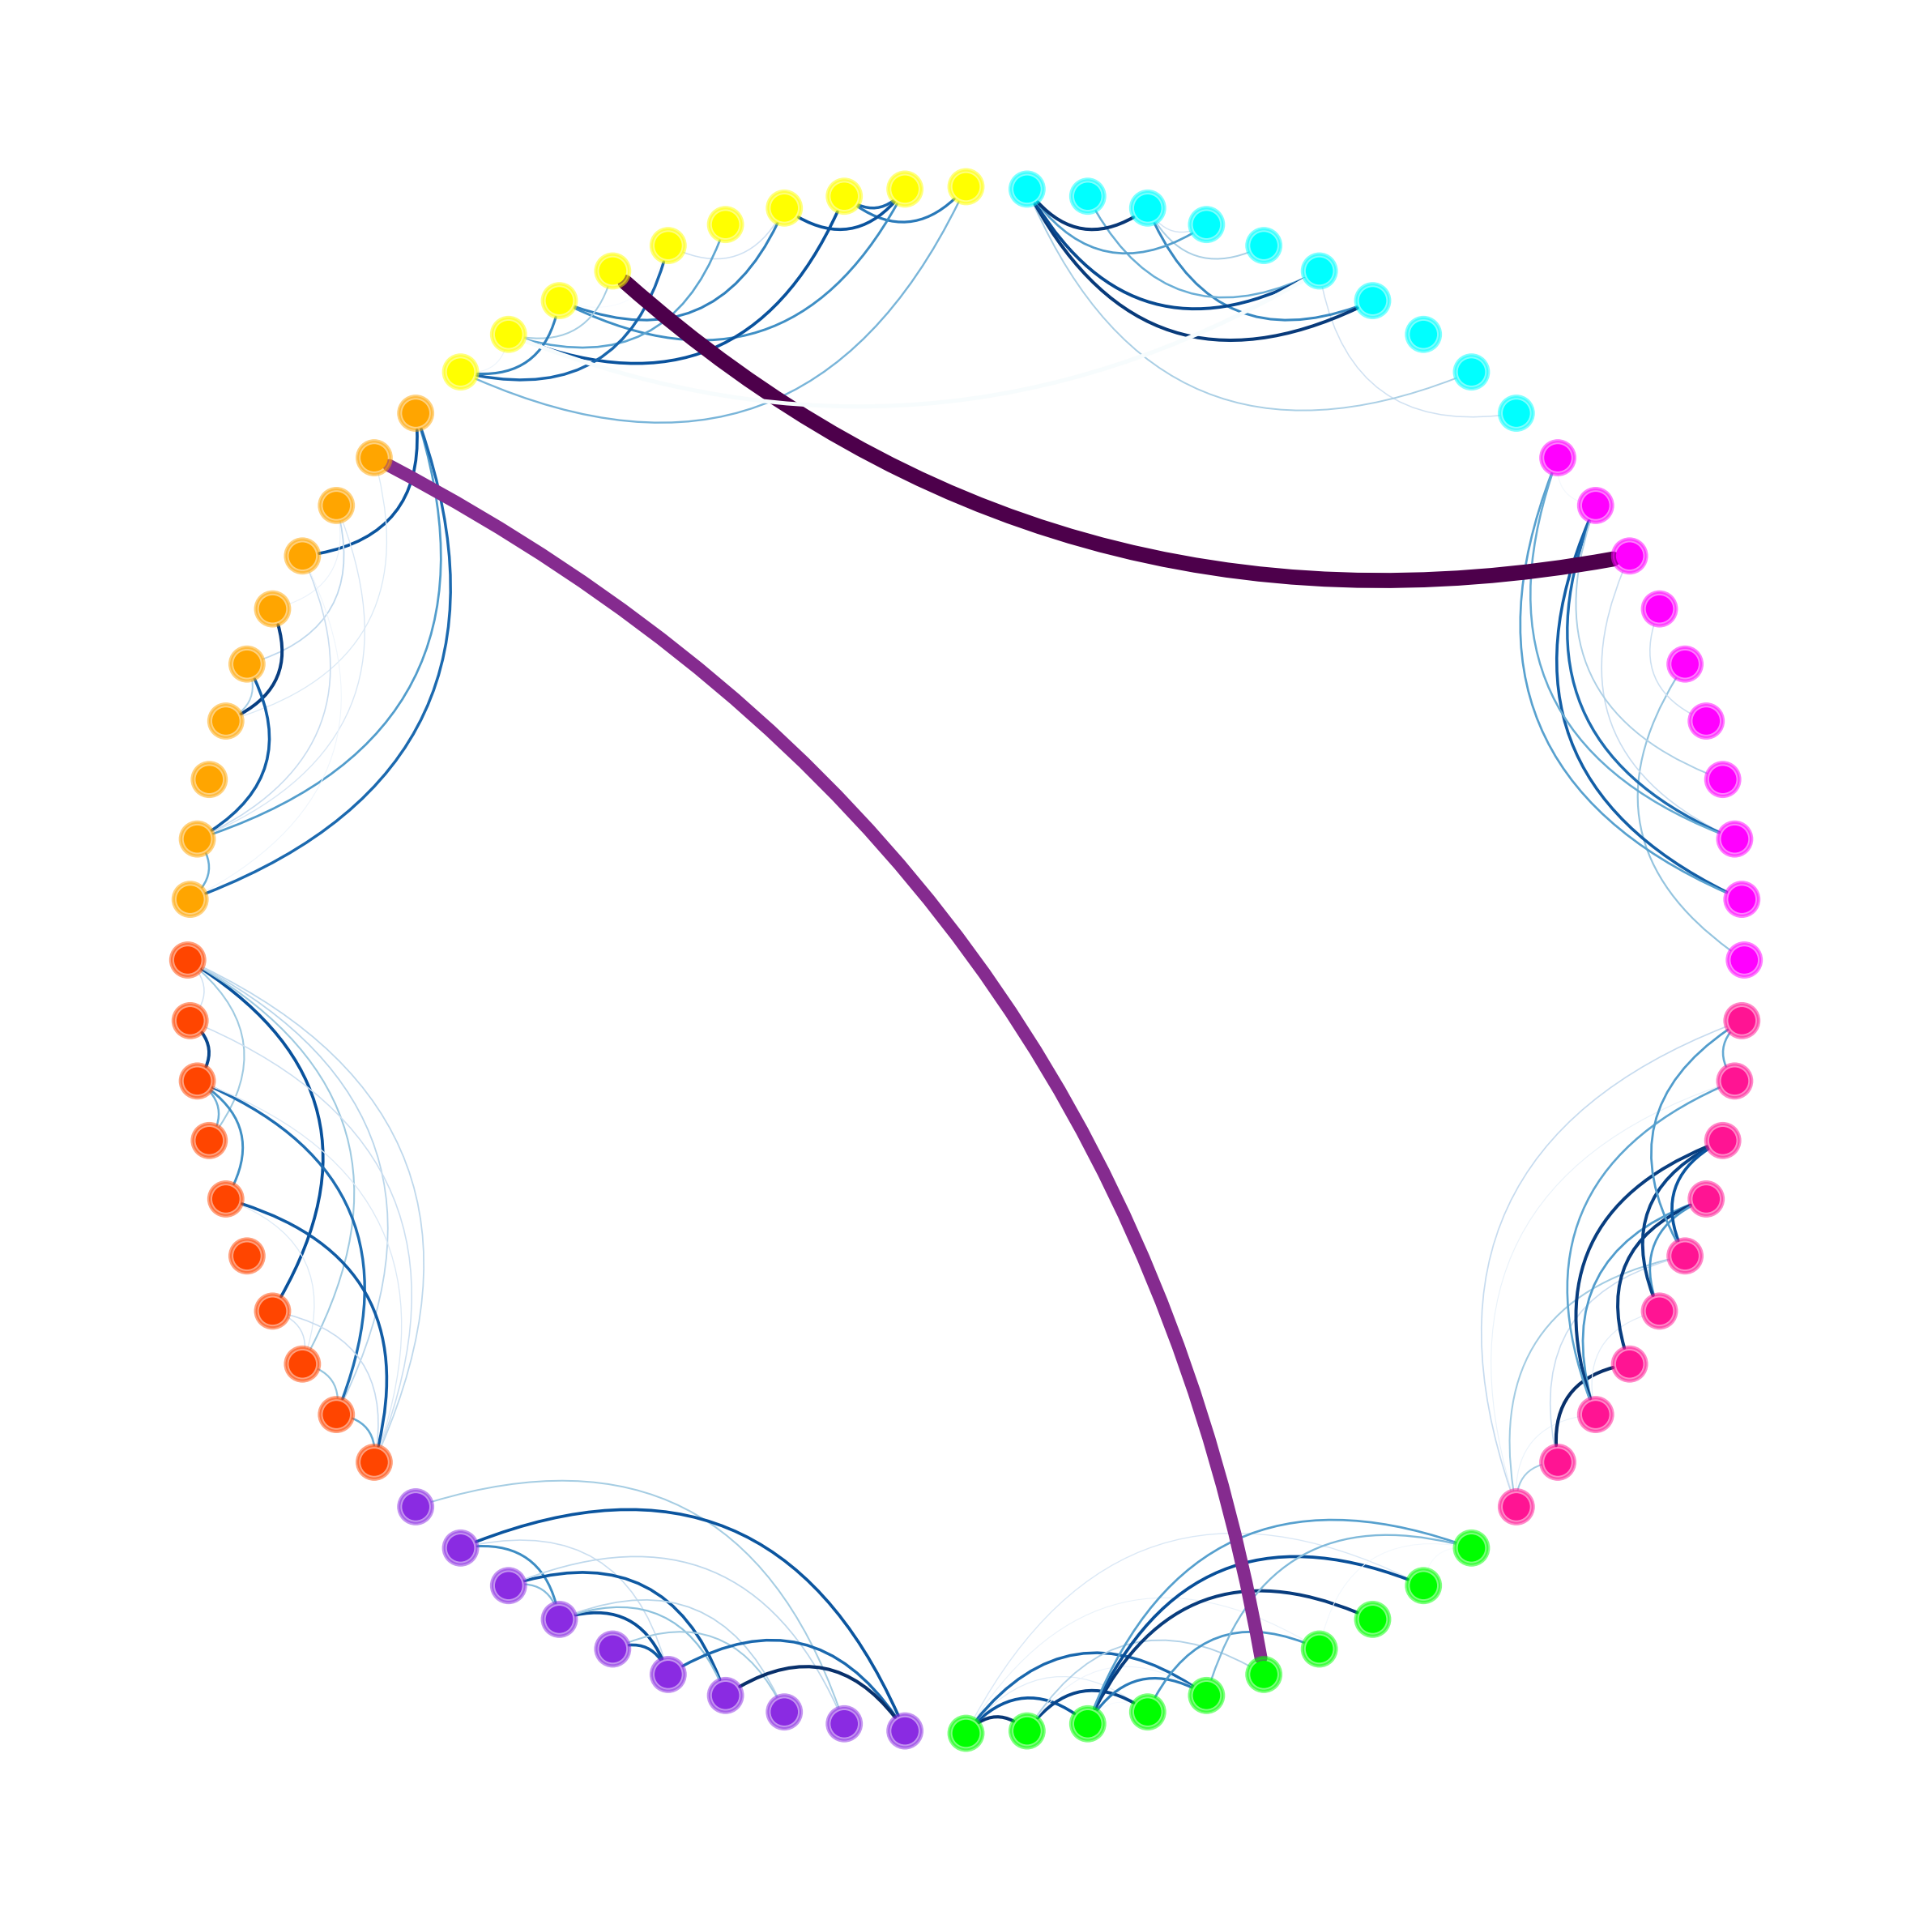

In [132]:
draw_graph(G,G1)
draw_graph(Gs,Gs1)